# Introduction

We have previously trained a convnet model to detect hand-drawn figures using the MNIST dataset. The model was trained on 60,000 images and 5 epochs with an accuracy of 99.50%, loss of 0.0160, value loss of 0.0407 and value accuracy of 0.9897.

We will be using this model to predict the values of 20 hand-drawn numbers and evaluate the model on how well it performs.

# Loading the Dataset

We first need to load the folder of images using the CV2 imaging library as well as the os module to access operating system paths. We then load the images and place them in a list for use.

In [ ]:
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

This defines the sizes of the images to be used as well as the path of the image folder

In [ ]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder=r'C:\\Users\\abdul\\Desktop\\AI\\numbers'

This function does the following things
* Traverses the root folder, opens the images and saves them in the list.
* Loads the images as grayscale using cv2.BGR2GRAY
* Resizes the images in order to fit the shape the model requires (28 * 28 pixels with 1 color channel), using inter area interpolation
* Sets the type of the images to float 32
* Normalizes the images from 0.0 to 1.0
* Defines the classes of each image based on the name of the folder they are in. The folders are named '0' to '9' and these names define the classes of the images

In [ ]:
def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, 0)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:\\Users\\abdul\\Desktop\\AI\\numbers')

# Displaying the Images

We can use Matplotlib to display the images in various indexes in the list

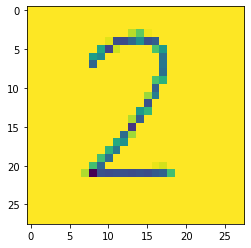

In [ ]:
plt.imshow(img_data[5])

# Preparing the data

We then convert this list into a Numpy array for use in the model

In [ ]:
imgs = np.array(img_data)

The numpy array is then reshaped to fit the model that we have previously created

In [ ]:
imgs =imgs.reshape((20,28,28,1))

In [ ]:
imgs.shape

(20, 28, 28, 1)

# Loading the model

We load the convnet model that we had previously created to test it on this new dataset.

In [ ]:
# To load a saved model
from tensorflow.keras.models import load_model
cnn=load_model('mnist_cnn.h5')

A summary of the model is shown below

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

We feed our image dataset into the convnet model

In [ ]:
predictions=cnn.predict(imgs)

# Evaluating the model

We can test the model to see how well it performs. We first define the class values in order to compare the predicted to the expected

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
target_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

The class data must be transformed into categorical data in order to compare the predicted and expected values

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
target_val=to_categorical(target_val)

In [ ]:
target_val.shape

(20, 10)

In [ ]:
target_val[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
images=imgs.reshape((20,28,28))
incorrect_predictions=[]

We then find the highest probability that each image might be. This is then compared to the class that it is supposed to be. The incorrect predictions are then stored in a list to be displayed

In [ ]:
for i, (p,e) in enumerate(zip(predictions,target_val)):
    predicted, expected = np.argmax(p),np.argmax(e)
    if predicted != expected: # prediction was incorrect
        incorrect_predictions.append((i,images[i],predicted, expected))

In [ ]:
len(incorrect_predictions)

18

The model has 18 innacurate predictions. This means that it has an accuracy of 10%

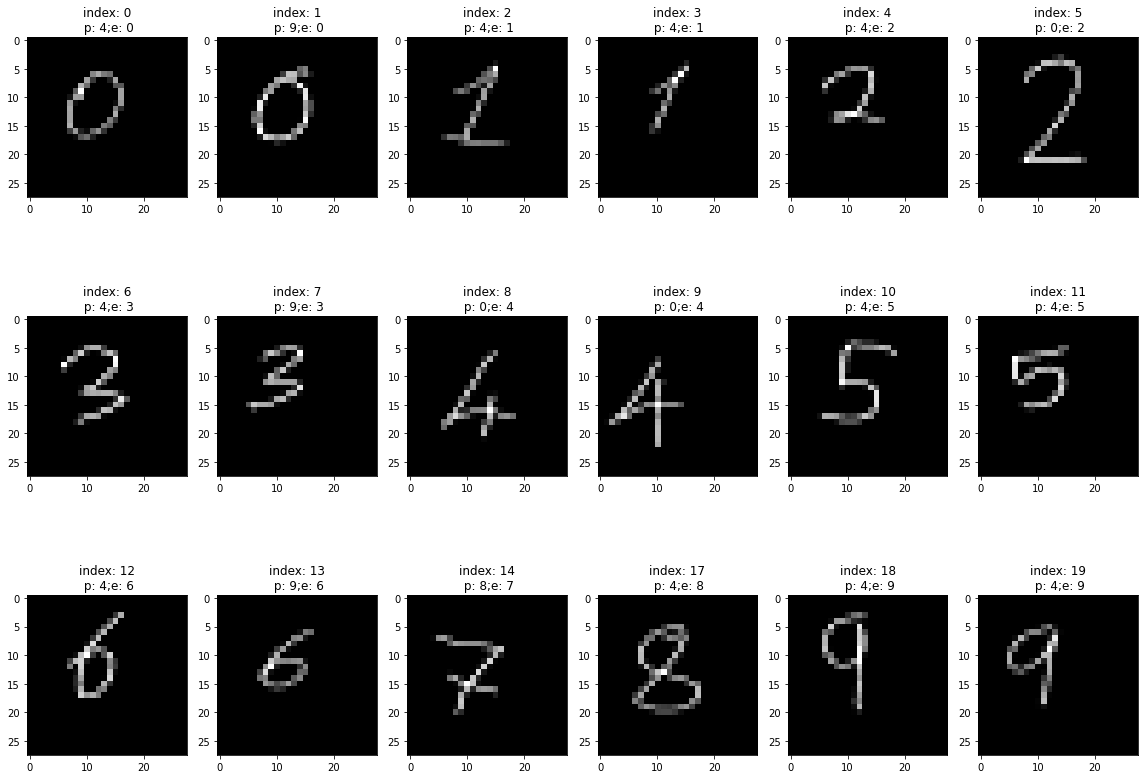

In [ ]:
figure, axes=plt.subplots(nrows=3, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image,predicted, expected = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_title(f'index: {index}\n p: {predicted};e: {expected}')
plt.tight_layout()

The predicted and expected values can be confirmed by viewing the images individually

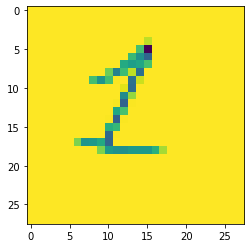

In [ ]:
plt.imshow(images[2])

In [ ]:
for index,probability in enumerate(predictions[2]):
    print(f"{index}: {probability:.10%}")

0: 15.0432184339%
1: 7.3232635856%
2: 7.0527561009%
3: 3.9916556329%
4: 23.8732457161%
5: 8.5070207715%
6: 10.3634752333%
7: 5.6072149426%
8: 11.3086342812%
9: 6.9295071065%


The model predicts this number to be a 4 with a 23.87% probability however it is actually a 1

# Conclusion

This model is not accurate at all (10%). This is most likely to do with overfitting where the model was highly specialized towards the training dataset however it performs poorly on new data.